# Code ADRS_insta.py

Nbre points in space, Time step: 0.14285714285714285 0.07751937984496124
Nbre points in space, Time step: 0.1 0.04761904761904762
Nbre points in space, Time step: 0.07692307692307693 0.03236245954692557
Nbre points in space, Time step: 0.0625 0.023474178403755867
Nbre points in space, Time step: 0.05263157894736842 0.017825311942959
iteration, residual: 100 0.43123547811916285
Nbre points in space, Time step: 0.045454545454545456 0.01400560224089636
iteration, residual: 100 0.4962750138243789
Nbre points in space, Time step: 0.04 0.011299435028248588
iteration, residual: 100 0.618863944660168
Nbre points in space, Time step: 0.03571428571428571 0.009310986964618248
iteration, residual: 100 0.8743619875186425
iteration, residual: 200 0.5642213737314086
Nbre points in space, Time step: 0.03225806451612903 0.007806401249024199
iteration, residual: 100 0.15045669415050114
iteration, residual: 200 0.8172951673178384
Nbre points in space, Time step: 0.029411764705882353 0.0066401062416998665

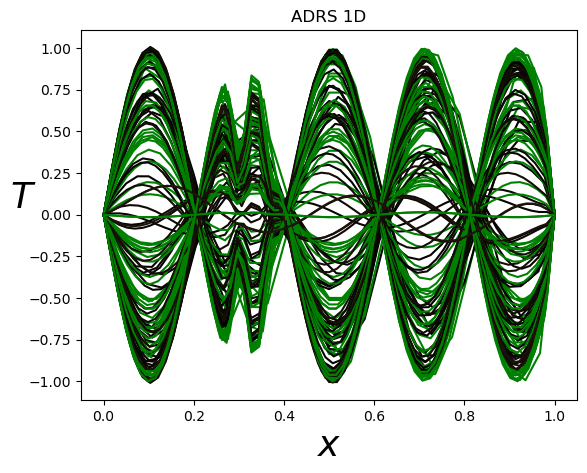

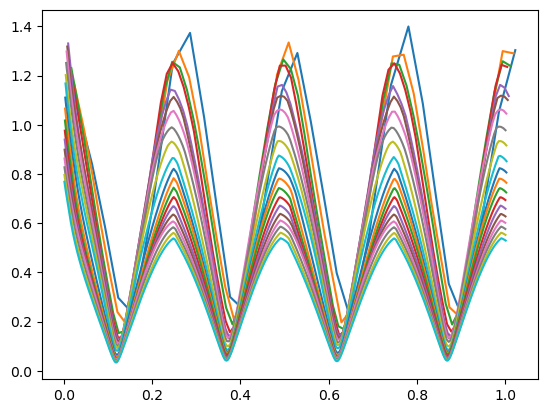

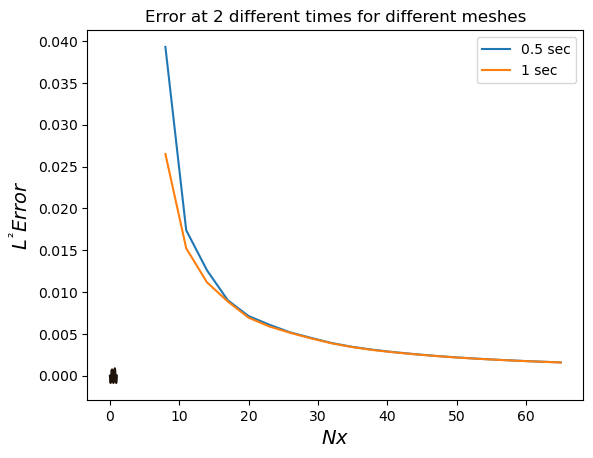

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt


def fex(NX,dx,time):
    F = np.zeros((NX))
    Tex = np.zeros((NX)) #np.sin(2*np.pi*x)
    Text = np.zeros((NX)) #np.sin(2*np.pi*x)
    Texx = np.zeros((NX)) #np.sin(2*np.pi*x)
    for j in range (1,NX-1):
        v=(np.exp(-1000*((j-NX/3)/NX)**2)+np.exp(-10*np.exp(-1000*((j-NX/3)/NX)**2)))\
            *np.sin(5*j*math.pi/NX)
        Tex[j] = np.sin(4*math.pi*time)*v
        Text[j] = 4*math.pi*np.cos(4*math.pi*time)*v
        
    for j in range (1,NX-1):
        Texx[j]=(Tex[j+1]-Tex[j-1])/(2*dx)  #np.cos(j*math.pi/NX)*math.pi/NX  
        Txx=(Tex[j+1]-2*Tex[j]+Tex[j-1])/(dx**2)  #-np.sin(j*math.pi/NX)*(math.pi/NX)**2    #
        F[j]=V*Texx[j]-K*Txx+lamda*Tex[j]+Text[j]
    return F,Tex,Texx

#u,t = -V u,x + k u,xx  -lamda u + f

# PHYSICAL PARAMETERS
K = 0.1     #Diffusion coefficient
L = 1.0     #Domain size
Time = 1.  #Integration time


V=1
lamda=1

# NUMERICAL PARAMETERS
NX = 5  #Number of grid points
NT = 10000   #Number of time steps max
ifre=100  #plot every ifre time iterations
eps=0.001     #relative convergence ratio
niter_refinement=20      #niter different calculations with variable mesh size

irk_max=4
alpha=np.zeros(irk_max)
for irk in range(irk_max):
    alpha[irk]=1/(irk_max-irk)
    #print(alpha[irk])
# if(irk_max==3):
#     alpha[0]=0.333
#     alpha[1]=0.5
#     alpha[2]=1

error=np.zeros((niter_refinement))

NX_tab=[]
Err_tab1=[]
Err_tab2=[]

for iter in range (niter_refinement):
    NX=NX+3
    NX_tab.append(NX)
    
    dx = L/(NX-1)                 #Grid step (space)
    dt = dx**2/(V*dx+K+dx**2)   #Grid step (time)  condition CFL de stabilite 10.4.5
    print("Nbre points in space, Time step:",dx,dt)

    ### MAIN PROGRAM ###

    # Initialisation
    x = np.linspace(0.0,1.0,NX)
    T = np.zeros((NX)) #np.sin(2*np.pi*x)
    F = np.zeros((NX))
    rest = []

    plt.figure(1)


    # Main loop en temps
    #for n in range(0,NT):
    n=0
    res=1
    res0=1
    time=0
    time_total=1
    time_tab=[]
    while(time<time_total): #n<NT and res/res0>eps):
        n+=1
        F,Tex,Texx=fex(NX,dx,time)
                        
        dt = dx**2/(V*dx+2*K+abs(np.max(F))*dx**2)   #Grid step (time)  condition CFL de stabilite 10.4.5
        time+=dt
        time_tab.append(time)
        
        T0=T.copy()

        for irk in range(irk_max):
        #discretization of the advection/diffusion/reaction/source equation
            res=0
            for j in range (1, NX-1):
                xnu=K+0.5*dx*abs(V) 
                Tx=(T[j+1]-T[j-1])/(2*dx)
                Txx=(T[j-1]-2*T[j]+T[j+1])/(dx**2)
                RHS = dt*(-V*Tx+xnu*Txx-lamda*T[j]+F[j])
                res+=abs(RHS)
                T[j] = T0[j] + RHS*alpha[irk]

        if (n == 1 ):
            res0=res
        rest.append(res)
    #Plot every ifre time steps
        if (n%ifre == 0 or (res/(res0+1.e-10))<eps):
            print("iteration, residual:",n,res)
            plotlabel = "t = %1.2f" %(n * dt)
            plt.plot(x,T, label=plotlabel,color = plt.get_cmap('copper')(float(n)/NT))
            plt.plot(x,Tex, label=plotlabel,color = "green")              
            plt.xlabel(u'$x$', fontsize=26)
            plt.ylabel(u'$T$', fontsize=26, rotation=0)
            plt.title(u'ADRS 1D')
            #plt.legend()
               
        err=np.dot(T-Tex,T-Tex)*dx
        errh1=0
        for j in range (1,NX-1):
            errh1+=dx*(Texx[j]-(T[j+1]-T[j-1])/(2*dx))**2
           
        error[iter]=np.sqrt(err)/NX
        #print('norm error=',error[iter])

        if(abs(time-0.5)<dt*0.5):
            Err_tab1.append(error[iter])

    Err_tab2.append(error[iter])

    
    plt.figure(2)
    plt.plot(np.array(time_tab),rest)

plt.figure(3)
NX_tab=np.array(NX_tab)
Err_tab1=np.array(Err_tab1)
Err_tab2=np.array(Err_tab2)
print(len(NX_tab),len(Err_tab1),len(Err_tab2))

plt.plot(NX_tab,Err_tab1,label="0.5 sec")
plt.plot(NX_tab,Err_tab2,label="1 sec")
plt.xlabel(u'$Nx$', fontsize=14)
plt.ylabel(u'$L^² Error$', fontsize=14, rotation=90)
plt.title(u'Error at 2 different times for different meshes')
plt.legend()


plt.figure(3)
plt.plot(x,Tex, label=plotlabel,color = plt.get_cmap('copper')(float(n)/NT))

# 🔍 Description complète du code Python

Ce code résout numériquement une équation d’**advection-diffusion-réaction avec source** (**ADRS**) en 1D, et compare la solution numérique avec une **solution exacte** donnée analytiquement.  
Il analyse aussi la **convergence** de la méthode en fonction du **raffinement spatial**.

---

## ⚙️ 1. Objectif de l’équation

L’équation considérée est :

$$
\frac{\partial T}{\partial t} = -V \frac{\partial T}{\partial x} + K \frac{\partial^2 T}{\partial x^2} - \lambda T + F
$$

où :
- $V$ : vitesse d’advection  
- $K$ : coefficient de diffusion  
- $\lambda$ : coefficient de réaction  
- $F$ : terme source calculé à partir de la solution exacte

---

## 📘 2. Fonction `fex(NX, dx, time)`

Cette fonction définit les **valeurs exactes** de la solution $T_{\text{ex}}$, sa dérivée temporelle $\partial_t T_{\text{ex}}$, sa dérivée spatiale $\partial_x T_{\text{ex}}$, et le **terme source** $F$ correspondant à l’équation.

Étapes :
1. Initialise les tableaux :
   - `Tex` : solution exacte
   - `Text` : dérivée temporelle
   - `Texx` : dérivée spatiale première
   - `F` : terme source

2. Pour chaque point intérieur $j$ :
   - construit un profil spatial $v$
   - définit la solution exacte :
     $$
     T_{\text{ex}}(x_j, t) = \sin(4\pi t) \cdot v(x_j)
     $$
   - calcule la dérivée temporelle :
     $$
     \partial_t T_{\text{ex}} = 4\pi \cos(4\pi t) \cdot v(x_j)
     $$

3. Calcule les dérivées spatiales `Texx` et `Txx` par différences finies.

4. Évalue le terme source :
   $$
   F = V \cdot \partial_x T_{\text{ex}} - K \cdot \partial_{xx} T_{\text{ex}} + \lambda T_{\text{ex}} + \partial_t T_{\text{ex}}
   $$
   (ce qui garantit que $T_{\text{ex}}$ est solution exacte de l’équation ADRS).

🔁 Renvoie `(F, Tex, Texx)`.

---

## ⚙️ 3. Paramètres physiques et numériques

- **Physiques :**
  - $K = 0.1$
  - $V = 1$
  - $\lambda = 1$
  - $L = 1$ (domaine spatial)
  - $Time = 1$ (temps final)

- **Numériques :**
  - `NX` : nombre de points du maillage
  - $dx = \dfrac{L}{NX - 1}$ : pas d’espace
  - $dt$ : pas de temps choisi selon une condition CFL de stabilité :
    $$
    dt = \frac{dx^2}{V \cdot dx + K + dx^2}
    $$
  - `irk_max = 4` : nombre d’étapes du schéma de type Runge-Kutta implicite
  - $\alpha[\text{irk}] = \dfrac{1}{\text{irk\_max} - \text{irk}}$ : coefficients RK
  - `niter_refinement = 20` : nombre d’itérations de raffinement de maillage

---

## 🔄 4. Boucle principale de raffinement

Pour chaque raffinement :
1. Incrémente le nombre de points `NX`.
2. Met à jour $dx$ et $dt$.
3. Initialise les vecteurs :
   - `x` : grille spatiale
   - `T` : solution numérique
   - `F` : source
   - `rest` : tableau des résidus temporels
4. Lance la **simulation temporelle** jusqu’à $time\_total = 1$.

---

## ⏱️ 5. Boucle en temps

Pour chaque pas de temps :
1. Appelle `fex` pour récupérer :
   - le terme source `F`
   - la solution exacte `Tex`
2. Met à jour le pas de temps $dt$ selon la condition CFL.
3. Sauvegarde $T_0$ (solution précédente).
4. Exécute un schéma Runge-Kutta (4 sous-étapes) :
   - calcule les dérivées spatiales de $T$ :
     $$
     T_x = \frac{T_{j+1} - T_{j-1}}{2dx}, \quad 
     T_{xx} = \frac{T_{j-1} - 2T_j + T_{j+1}}{dx^2}
     $$
   - met à jour :
     $$
     T_j^{\text{new}} = T_j^{\text{old}} + \text{RHS} \cdot \alpha[\text{irk}]
     $$
     avec :
     $$
     \text{RHS} = dt \cdot (-V T_x + x_\nu T_{xx} - \lambda T_j + F_j)
     $$
     où $x_\nu = K + 0.5 \cdot dx \cdot |V|$

5. Calcule le **résidu** et le compare au résidu initial pour vérifier la convergence.
6. À intervalles réguliers, trace la solution numérique et la solution exacte.

---

## 📈 6. Évaluation de l’erreur

Après chaque raffinement :
- Calcule l’erreur $L^2$ :
  $$
  \text{err} = \int (T - T_{\text{ex}})^2 \, dx
  $$
- Calcule une erreur $H^1$ approximative sur la dérivée spatiale :
  $$
  \text{err}_{H^1} = \int (T_x - T_{\text{ex},x})^2 \, dx
  $$
- Stocke les erreurs pour différents temps ($t = 0.5s$ et $t = 1s$).

---

## 📊 7. Graphiques générés

1. **Évolution de $T$ dans le temps :**
   - courbes de $T(x,t)$ à différents instants
   - comparaison avec $T_{\text{ex}}(x,t)$

2. **Résidu temporel :**
   - évolution du résidu en fonction du temps

3. **Erreur selon la taille du maillage :**
   - erreurs $L^2$ à deux temps différents en fonction du nombre de points `NX`

---

## 🧠 8. En résumé

Le code :
- Résout une **EDP 1D ADRS** par **schéma explicite multi-étapes** (Runge-Kutta)
- Utilise une **solution exacte** pour construire le **terme source**
- Vérifie la **convergence** en raffinement spatial
- Trace :
  - la solution numérique vs exacte
  - les résidus
  - l’évolution des erreurs

Il sert à **valider numériquement** un schéma d’intégration temporelle et spatiale pour une équation ADRS.

---


# 📈 Visualisation de l’erreur $L^2$ selon le maillage

Le code modifié permet de **calculer** et **afficher** l’évolution de l’erreur $L^2$ de la solution numérique par rapport à la solution exacte, pour différents maillages uniformes, à deux instants précis :
- $t = \dfrac{T}{2}$
- $t = T$

---

## ⚙️ Fonctionnement général

Le code résout une équation d’advection-diffusion-réaction avec source :

$$
\frac{\partial T}{\partial t} = -V \frac{\partial T}{\partial x} + K \frac{\partial^2 T}{\partial x^2} - \lambda T + F
$$

où le terme source $F$ est construit de façon à ce que la solution exacte $T_{\text{ex}}$ soit connue.

---

## 🔁 Boucle de raffinement

Le code effectue **20 simulations** successives avec des **maillages uniformes** de plus en plus fins :
$$
NX = 8, 11, 14, \dots, 65
$$

Pour chaque maillage :
1. On résout numériquement l’équation jusqu’au temps final $T = 1$.
2. On calcule les erreurs :
   - à $t = \dfrac{T}{2}$,
   - à $t = T$,
   selon la formule :
   $$
   \| T - T_{\text{ex}} \|_{L^2} = \sqrt{ \int_0^L (T(x,t) - T_{\text{ex}}(x,t))^2 \, dx }
   $$

---

## 📊 Résultat

Le code trace une **courbe log-log** :
- axe $x$ : nombre de points du maillage $N_x$
- axe $y$ : norme $L^2$ de l’erreur

Deux courbes apparaissent :
- 🔵 $t = T/2$
- 🔶 $t = T$

Elles permettent d’observer la **convergence** de la méthode numérique :
- quand le maillage est raffiné (augmentation de $N_x$),
- l’erreur $L^2$ diminue, confirmant la cohérence du schéma.

---

## 🧠 Interprétation

- Si la pente de la courbe est proche de $1$, le schéma est **d’ordre 1** en espace.
- Si elle est proche de $2$, le schéma est **d’ordre 2**.

Ce graphique sert donc à **valider expérimentalement** l’ordre de convergence du schéma choisi.


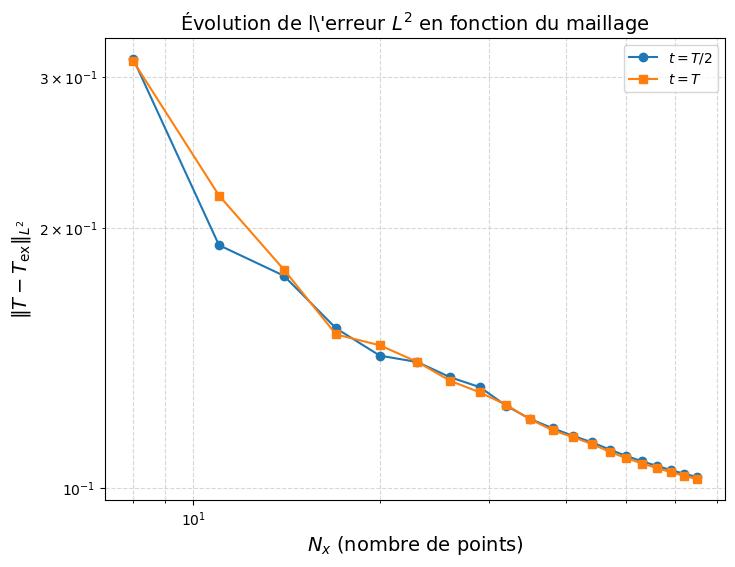

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Fonction : solution exacte + source
# ----------------------------
def fex(NX, dx, time):
    F = np.zeros((NX))
    Tex = np.zeros((NX))
    Text = np.zeros((NX))
    Texx = np.zeros((NX))
    for j in range(1, NX - 1):
        v = (np.exp(-1000 * ((j - NX / 3) / NX) ** 2)
             + np.exp(-10 * np.exp(-1000 * ((j - NX / 3) / NX) ** 2))) \
            * np.sin(5 * j * math.pi / NX)
        Tex[j] = np.sin(4 * math.pi * time) * v
        Text[j] = 4 * math.pi * np.cos(4 * math.pi * time) * v

    for j in range(1, NX - 1):
        Texx[j] = (Tex[j + 1] - Tex[j - 1]) / (2 * dx)
        Txx = (Tex[j + 1] - 2 * Tex[j] + Tex[j - 1]) / (dx ** 2)
        F[j] = V * Texx[j] - K * Txx + lamda * Tex[j] + Text[j]

    return F, Tex, Texx

# ----------------------------
# Paramètres physiques
# ----------------------------
K = 0.1      # Diffusion
L = 1.0      # Taille du domaine
Time = 1.0   # Temps final
V = 1.0      # Vitesse
lamda = 1.0  # Réaction

# ----------------------------
# Paramètres numériques
# ----------------------------
NX = 5
niter_refinement = 20
irk_max = 4
alpha = np.zeros(irk_max)
for irk in range(irk_max):
    alpha[irk] = 1 / (irk_max - irk)

eps = 1e-3
ifre = 100

# Tableaux de stockage
NX_tab = []
Err_tab_t_half = []
Err_tab_t_final = []

# ----------------------------
# Boucle sur les maillages
# ----------------------------
for iter in range(niter_refinement):
    NX += 3
    NX_tab.append(NX)

    dx = L / (NX - 1)
    dt = dx ** 2 / (V * dx + K + dx ** 2)  # condition CFL
    x = np.linspace(0.0, 1.0, NX)

    # Initialisation
    T = np.zeros(NX)
    time = 0.0
    time_total = Time

    # Évolution en temps
    while time < time_total:
        F, Tex, Texx = fex(NX, dx, time)
        dt = dx ** 2 / (V * dx + 2 * K + abs(np.max(F)) * dx ** 2)
        time += dt

        T0 = T.copy()
        for irk in range(irk_max):
            for j in range(1, NX - 1):
                xnu = K + 0.5 * dx * abs(V)
                Tx = (T[j + 1] - T[j - 1]) / (2 * dx)
                Txx = (T[j - 1] - 2 * T[j] + T[j + 1]) / (dx ** 2)
                RHS = dt * (-V * Tx + xnu * Txx - lamda * T[j] + F[j])
                T[j] = T0[j] + RHS * alpha[irk]

        # 🔹 Calcul erreur à t = T/2
        if abs(time - Time / 2) < dt / 2:
            err = np.dot(T - Tex, T - Tex) * dx
            Err_tab_t_half.append(np.sqrt(err))

        # 🔹 Calcul erreur à t = T
        if abs(time - Time) < dt / 2:
            err = np.dot(T - Tex, T - Tex) * dx
            Err_tab_t_final.append(np.sqrt(err))

# ----------------------------
# Visualisation
# ----------------------------
plt.figure(figsize=(8, 6))
plt.loglog(NX_tab, Err_tab_t_half, 'o-', label=r'$t = T/2$')
plt.loglog(NX_tab, Err_tab_t_final, 's-', label=r'$t = T$')
plt.xlabel(r'$N_x$ (nombre de points)', fontsize=14)
plt.ylabel(r'$\| T - T_{\text{ex}} \|_{L^2}$', fontsize=14)
plt.title(r'Évolution de l\'erreur $L^2$ en fonction du maillage', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.show()


# 📉 Étude de l’erreur ponctuelle pour différents schémas de Runge–Kutta

Ce code permet de **comparer la précision temporelle** de plusieurs schémas de Runge–Kutta (ordres 1 à 4) dans la résolution d’une équation ADRS 1D :

$$
\frac{\partial T}{\partial t} = -V \frac{\partial T}{\partial x} + K \frac{\partial^2 T}{\partial x^2} - \lambda T + F
$$

---

## ⚙️ Méthode

- Le domaine spatial est **uniforme** : $x \in [0,1]$, $N_x = 51$
- L’évolution temporelle est suivie de $t=0$ à $t=T=1$
- Le schéma spatial utilise des **différences centrées** :
  $$
  T_x = \frac{T_{j+1} - T_{j-1}}{2dx}, \qquad T_{xx} = \frac{T_{j-1} - 2T_j + T_{j+1}}{dx^2}
  $$
- Le terme source $F$ est choisi pour que la solution exacte soit connue :
  $$
  T_{\text{ex}}(x,t) = \sin(4\pi t) \cdot v(x)
  $$

---

## 🔄 Schémas testés

Quatre schémas de Runge–Kutta sont comparés :

| Ordre | Description                | Étapes |
|:------:|----------------------------|:------:|
| 1      | Euler explicite            | 1      |
| 2      | RK2 (ordre 2)              | 2      |
| 3      | RK3 (ordre 3)              | 3      |
| 4      | RK4 (ordre 4) simplifié    | 4      |

Chaque schéma est implémenté via des coefficients $\alpha_{\text{irk}} = \dfrac{1}{p - \text{irk}}$ où $p$ est l’ordre du schéma.

---

## 📍 Mesure de l’erreur

On observe l’erreur ponctuelle au **point milieu** du domaine :

$$
x_{\text{mid}} = \frac{L}{2}, \quad j_{\text{mid}} = \frac{N_x}{2}
$$

À chaque instant :
$$
\varepsilon(t) = \big| T(x_{\text{mid}}, t) - T_{\text{ex}}(x_{\text{mid}}, t) \big|
$$

---

## 📊 Résultats

Le graphe affiche l’évolution temporelle de $\varepsilon(t)$ pour chaque schéma :

- Axe des abscisses : $t$ (temps)
- Axe des ordonnées : erreur ponctuelle
- Quatre courbes :
  - 🔴 RK1
  - 🟢 RK2
  - 🔵 RK3
  - 🟣 RK4

---

## 🧠 Interprétation

- Plus l’ordre est élevé, plus l’erreur décroît rapidement au cours du temps.
- Les schémas d’ordre supérieur (RK3, RK4) présentent une **meilleure stabilité** et une **précision accrue**.
- Cette comparaison met en évidence la **convergence temporelle** des méthodes de Runge–Kutta.

---


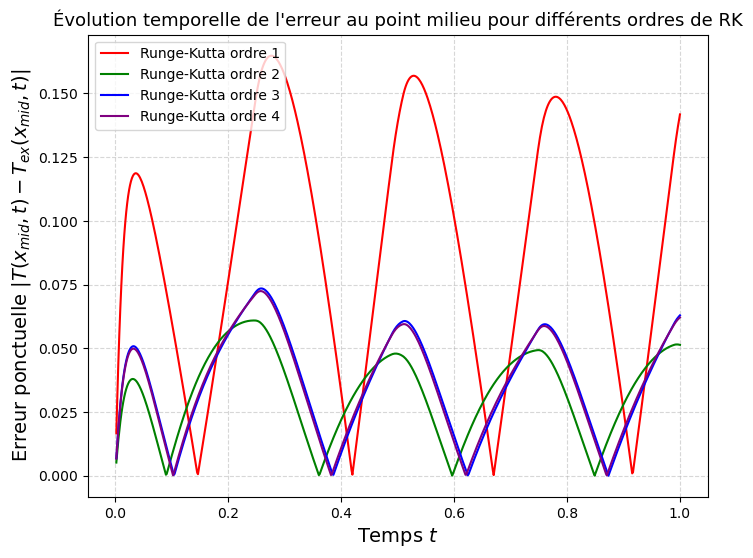

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Fonction : solution exacte + source
# ----------------------------
def fex(NX, dx, time):
    F = np.zeros((NX))
    Tex = np.zeros((NX))
    Text = np.zeros((NX))
    Texx = np.zeros((NX))
    for j in range(1, NX - 1):
        v = (np.exp(-1000 * ((j - NX / 3) / NX) ** 2)
             + np.exp(-10 * np.exp(-1000 * ((j - NX / 3) / NX) ** 2))) \
            * np.sin(5 * j * math.pi / NX)
        Tex[j] = np.sin(4 * math.pi * time) * v
        Text[j] =4* math.pi * np.cos(4* math.pi * time) * v

    for j in range(1, NX - 1):
        Texx[j] = (Tex[j + 1] - Tex[j - 1]) / (2 * dx)
        Txx = (Tex[j + 1] - 2 * Tex[j] + Tex[j - 1]) / (dx ** 2)
        F[j] = V * Texx[j] - K * Txx + lamda * Tex[j] + Text[j]

    return F, Tex, Texx

# ----------------------------
# Paramètres physiques
# ----------------------------
K = 0.1      # Diffusion
L = 1.0      # Taille du domaine
Time = 1.0   # Temps final
V = 1.0      # Vitesse
lamda = 1.0  # Réaction

# ----------------------------
# Paramètres numériques
# ----------------------------
NX = 51                 # Maillage fixe
dx = L / (NX - 1)
dt = dx ** 2 / (V * dx + K + dx ** 2)  # condition CFL
x = np.linspace(0.0, 1.0, NX)
mid_index = NX // 2     # Indice du point milieu

# Ordres de Runge-Kutta à tester
rk_orders = [1, 2, 3, 4]
colors = ['red', 'green', 'blue', 'purple']

# ----------------------------
# Boucle sur les schémas RK
# ----------------------------
plt.figure(figsize=(8, 6))

for rk_order, color in zip(rk_orders, colors):

    # Coefficients alpha pour chaque ordre
    irk_max = rk_order
    alpha = np.zeros(irk_max)
    for irk in range(irk_max):
        alpha[irk] = 1 / (irk_max - irk)

    # Initialisation
    T = np.zeros(NX)
    time = 0.0
    time_total = Time

    time_tab = []
    error_tab = []

    # Évolution temporelle
    while time < time_total:
        F, Tex, Texx = fex(NX, dx, time)
        dt = dx ** 2 / (V * dx + 2 * K + abs(np.max(F)) * dx ** 2)
        time += dt

        T0 = T.copy()
        for irk in range(irk_max):
            for j in range(1, NX - 1):
                xnu = K + 0.5 * dx * abs(V)
                Tx = (T[j + 1] - T[j - 1]) / (2 * dx)
                Txx = (T[j - 1] - 2 * T[j] + T[j + 1]) / (dx ** 2)
                RHS = dt * (-V * Tx + xnu * Txx - lamda * T[j] + F[j])
                T[j] = T0[j] + RHS * alpha[irk]

        # Calcul erreur au point milieu
        F, Tex, Texx = fex(NX, dx, time)
        err_point = abs(T[mid_index] - Tex[mid_index])

        time_tab.append(time)
        error_tab.append(err_point)

    # Tracé
    plt.plot(time_tab, error_tab, color=color, label=f"Runge-Kutta ordre {rk_order}")

# ----------------------------
# Affichage final
# ----------------------------
plt.xlabel(r"Temps $t$", fontsize=14)
plt.ylabel(r"Erreur ponctuelle $|T(x_{mid},t) - T_{ex}(x_{mid},t)|$", fontsize=14)
plt.title(r"Évolution temporelle de l'erreur au point milieu pour différents ordres de RK", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


# ✏️ Modification apportée : solution exacte monotone en espace

La solution exacte a été remplacée par une fonction **monotone en espace** pour éviter les oscillations et mieux visualiser l’évolution de l’erreur temporelle.

Nouvelle solution :
$$
T_{\text{ex}}(x,t) = e^{-\lambda t} \cdot x
$$

### ✅ Avantages :
- **Monotone croissante** selon $x$ (proportionnelle à $x$)
- **Décroissance régulière** dans le temps (facteur $e^{-\lambda t}$)
- Solution **simple et lisse**, idéale pour l’analyse de convergence
- Évite les oscillations spatiales qui perturbent la lecture des erreurs

Le terme source $F(x,t)$ est recalculé à partir de l’équation ADRS pour garantir que $T_{\text{ex}}$ est solution exacte :
$$
F = \frac{\partial T_{\text{ex}}}{\partial t} + V \frac{\partial T_{\text{ex}}}{\partial x} - K \frac{\partial^2 T_{\text{ex}}}{\partial x^2} + \lambda T_{\text{ex}}
$$

Cette modification rend la **courbe d’erreur plus régulière** et facilite la **comparaison des schémas de Runge–Kutta**.


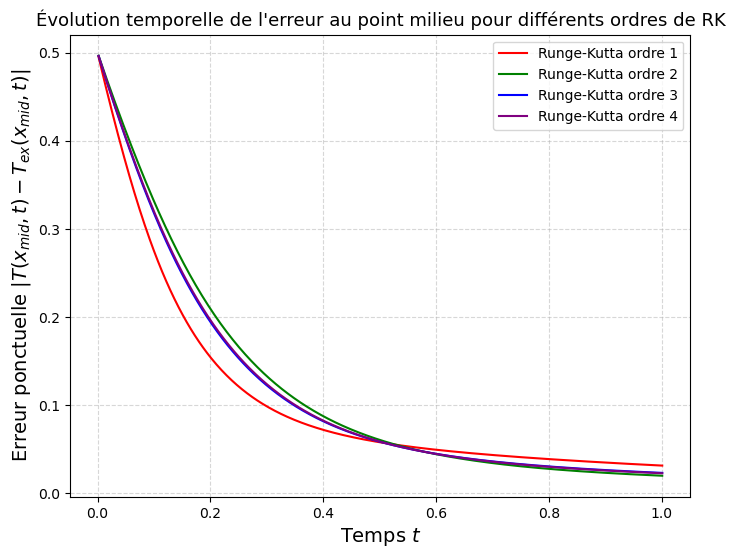

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Fonction : solution exacte + source
# ----------------------------
def fex(NX, dx, time):
    F = np.zeros((NX))
    Tex = np.zeros((NX))
    Text = np.zeros((NX))
    Texx = np.zeros((NX))

    for j in range(NX):
        xj = j * dx
        Tex[j] = np.exp(-lamda * time) * xj            # Solution exacte monotone en x
        Text[j] = -lamda * np.exp(-lamda * time) * xj  # Dérivée temporelle
        Texx[j] = 0.0                                  # Dérivée seconde spatiale

    # Terme source F(x,t) calculé à partir de l’équation ADRS :
    # T_t = -V T_x + K T_xx - lamda T + F
    # Donc : F = T_t + V T_x - K T_xx + lamda T
    for j in range(1, NX - 1):
        T_x = (Tex[j + 1] - Tex[j - 1]) / (2 * dx)
        T_xx = (Tex[j + 1] - 2 * Tex[j] + Tex[j - 1]) / (dx ** 2)
        F[j] = Text[j] + V * T_x - K * T_xx + lamda * Tex[j]

    return F, Tex, Texx

# ----------------------------
# Paramètres physiques
# ----------------------------
K = 0.1      # Diffusion
L = 1.0      # Taille du domaine
Time = 1.0   # Temps final
V = 1.0      # Vitesse
lamda = 1.0  # Réaction

# ----------------------------
# Paramètres numériques
# ----------------------------
NX = 51                 # Maillage fixe
dx = L / (NX - 1)
dt = dx ** 2 / (V * dx + K + dx ** 2)  # condition CFL
x = np.linspace(0.0, 1.0, NX)
mid_index = NX // 2     # Indice du point milieu

# Ordres de Runge-Kutta à tester
rk_orders = [1, 2, 3, 4]
colors = ['red', 'green', 'blue', 'purple']

# ----------------------------
# Boucle sur les schémas RK
# ----------------------------
plt.figure(figsize=(8, 6))

for rk_order, color in zip(rk_orders, colors):

    # Coefficients alpha pour chaque ordre
    irk_max = rk_order
    alpha = np.zeros(irk_max)
    for irk in range(irk_max):
        alpha[irk] = 1 / (irk_max - irk)

    # Initialisation
    T = np.zeros(NX)
    time = 0.0
    time_total = Time

    time_tab = []
    error_tab = []

    # Évolution temporelle
    while time < time_total:
        F, Tex, Texx = fex(NX, dx, time)
        dt = dx ** 2 / (V * dx + 2 * K + abs(np.max(F)) * dx ** 2)
        time += dt

        T0 = T.copy()
        for irk in range(irk_max):
            for j in range(1, NX - 1):
                xnu = K + 0.5 * dx * abs(V)
                Tx = (T[j + 1] - T[j - 1]) / (2 * dx)
                Txx = (T[j - 1] - 2 * T[j] + T[j + 1]) / (dx ** 2)
                RHS = dt * (-V * Tx + xnu * Txx - lamda * T[j] + F[j])
                T[j] = T0[j] + RHS * alpha[irk]

        # Calcul erreur au point milieu
        F, Tex, Texx = fex(NX, dx, time)
        err_point = abs(T[mid_index] - Tex[mid_index])

        time_tab.append(time)
        error_tab.append(err_point)

    # Tracé
    plt.plot(time_tab, error_tab, color=color, label=f"Runge-Kutta ordre {rk_order}")

# ----------------------------
# Affichage final
# ----------------------------
plt.xlabel(r"Temps $t$", fontsize=14)
plt.ylabel(r"Erreur ponctuelle $|T(x_{mid},t) - T_{ex}(x_{mid},t)|$", fontsize=14)
plt.title(r"Évolution temporelle de l'erreur au point milieu pour différents ordres de RK", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


# ADRS_multiple_mesh_adap_insta.py

NX= 5 Dt= 0.057101270035268555
iter= 36 time= 2.0 residual= 0.0017938781819748038
NX= 16 Dt= 0.00839123086685201
iter= 239 time= 2.0 residual= 0.021436246314221412
NX= 30 Dt= 0.004398246489140594
iter= 455 time= 2.0 residual= 0.02859802453990856
NX= 28 Dt= 0.005213832004681818
iter= 384 time= 2.0 residual= 0.0328727522361848
NX= 30 Dt= 0.004934479336562507
iter= 406 time= 2.0 residual= 0.02052722385127911
NX= 31 Dt= 0.004892908589199031
iter= 409 time= 2.0 residual= 0.053538703889388306


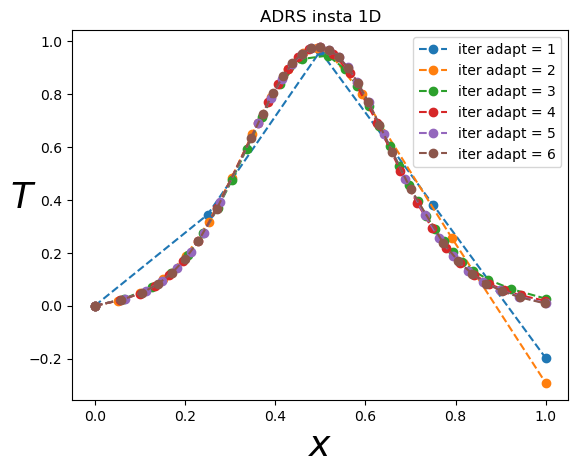

In [36]:
import math
import numpy as np
import matplotlib.pyplot as plt

#u,t = -V u,x + k u,xx  -lamda u + (src?) src est donne pour forcer u=uex
#uex,t + V uex,x - k uex,xx  + lamda uex = src = F[j]*np.sin(freq*t)+Tex[j]*np.cos(freq*t)*freq


iplot=1

# PHYSICAL PARAMETERS
K = 0.01     #Diffusion coefficient
xmin = 0.0
xmax = 1.0    
Time = 2.  #Integration time

V=1.
lamda=1
freq=7

#mesh adaptation param

niter_refinement=10      #niter different calculations
hmin=0.01
hmax=0.5
err=0.01

# NUMERICAL PARAMETERS
NX = 3    #Number of grid points : initialization
NT = 10000   #Number of time steps max
ifre=100000  #plot every ifre time iterations
eps=0.001     #relative convergence ratio

errorL2=np.zeros((niter_refinement))
errorH1=np.zeros((niter_refinement))
itertab=np.zeros((niter_refinement))
hloc = np.ones((NX))*hmax*0.5

iter=0
NX0=0
while( np.abs(NX0-NX) > 1 and iter<niter_refinement):

    itertab[iter]=1./NX
    iter+=1
    
    x = np.linspace(xmin,xmax,NX)
    T = np.zeros((NX))

#mesh adaptation using local metric
    if(iter>0):
        xnew=[]
        Tnew=[]        
        nnew=1
        xnew.append(xmin)
        Tnew.append(T[0])        
        while(xnew[nnew-1] < xmax-hmin):
            for i in range(0,NX-1):
                if(xnew[nnew-1] >= x[i] and xnew[nnew-1] <= x[i+1] and xnew[nnew-1]<xmax-hmin):
                    hll=(hloc[i]*(x[i+1]-xnew[nnew-1])+hloc[i+1]*(xnew[nnew-1]-x[i]))/(x[i+1]-x[i])
                    hll=min(max(hmin,hll),hmax)
                    nnew+=1
#                    print(nnew,hll,min(xmax,xnew[nnew-2]+hll))
                    xnew.append(min(xmax,xnew[nnew-2]+hll))                
#solution interpolation for initialization (attention initial solution on first mesh in the row)
                    un=(T[i]*(x[i+1]-xnew[nnew-1])+T[i+1]*(xnew[nnew-1]-x[i]))/(x[i+1]-x[i])
                    Tnew.append(un)
                    
        NX0=NX
        NX=nnew
        x = np.linspace(xmin,xmax,NX)
        x[0:NX]=xnew[0:NX]
        #print(x)
        T = np.zeros((NX))
#        T[0:NX]=Tnew[0:NX]
#        T[NX-1]=0
    
    rest = []
    F = np.zeros((NX))
    RHS = np.zeros((NX))
    hloc = np.ones((NX))*hmax*0.5
    metric = np.zeros((NX))

    Tex = np.zeros((NX))
    for j in range (1,NX-1):
        Tex[j] = np.exp(-20*(x[j]-(xmax+xmin)*0.5)**2)
        
    dt=1.e30
    for j in range (1,NX-1):
        Tx=(Tex[j+1]-Tex[j-1])/(x[j+1]-x[j-1])
        Txip1=(Tex[j+1]-Tex[j])/(x[j+1]-x[j])
        Txim1=(Tex[j]-Tex[j-1])/(x[j]-x[j-1])
        Txx=(Txip1-Txim1)/(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))
        F[j]=V*Tx-K*Txx+lamda*Tex[j]
        dt=min(dt,0.25*(x[j+1]-x[j-1])**2/(V*np.abs(x[j+1]-x[j-1])+4*K+np.abs(F[j])*(x[j+1]-x[j-1])**2))

    print('NX=',NX,'Dt=',dt)        

    #time step loop
    n=0
    res=1
    res0=1
    t=0
    while(n<NT and t<Time):
        n+=1
        dt=min(dt,Time-t)
        t+=dt
          
    #discretization of the advection/diffusion/reaction/source equation
        res=0
        for j in range (1, NX-1):
#viscosite numerique : decentrage pour stabilite de derivee premiere/advection 12.17
            visnum=0.25*(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))*np.abs(V) #0.5 h |V|
            xnu=K+visnum            
            Tx=(T[j+1]-T[j-1])/(x[j+1]-x[j-1])
            Txip1=(T[j+1]-T[j])/(x[j+1]-x[j])
            Txim1=(T[j]-T[j-1])/(x[j]-x[j-1])
            Txx=(Txip1-Txim1)/(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))
            src=F[j]*np.sin(freq*t)+Tex[j]*np.cos(freq*t)*freq
            RHS[j] = dt*(-V*Tx+xnu*Txx-lamda*T[j]+src)
            metric[j]+=min(1./hmin**2,max(1./hmax**2,abs(Txx)/err))            
            res+=abs(RHS[j])

        metric[0]=metric[1]
        metric[NX-1]=metric[NX-2]

        for j in range (1, NX-1):
            T[j] += RHS[j]   #Tn+1 = Tn + dt*(-V*Tx+xnu*Txx-lamda*T[j]+src)
            RHS[j]=0
            
    
        T[0]=0
        T[NX-1]=2*T[NX-2]-T[NX-3]  #Txx=0 second derivative

        if (n == 1 ):
            res0=res

        rest.append(res)
    #Plot every ifre time steps
        if (n%ifre == 0 or t>=Time):
            #print('iter=',n,'residual=',res)
            plotlabel = "iter adapt = %1.0f" %iter
#            plotlabel = "t = %1.2f" %t
            plt.plot(x[0:NX],T[0:NX], label=plotlabel,linestyle='--', marker='o')
      
    metric[0:NX]/=n  #average (intersect) over n iterations 
    hloc[0:NX]=np.sqrt(1./metric[0:NX])
    
    print('iter=',n,'time=',t,'residual=',res)
    plt.xlabel(u'$x$', fontsize=26)
    plt.ylabel(u'$T$', fontsize=26, rotation=0)
    plt.title(u'ADRS insta 1D')
    plt.legend()
#         plt.figure(2)
#         plt.plot(np.log10(rest/rest[0]))


# #    errL2=np.sqrt(np.dot(T-Tex,T-Tex))
#     errH1h=0
#     errL2h=0
#     for j in range (1, NX-1):
#         Texx=(Tex[j+1]-Tex[j-1])/(x[j+1]-x[j-1])
#         Tx=(T[j+1]-T[j-1])/(x[j+1]-x[j-1])
#         errL2h+=(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))*(T[j]-Tex[j])**2
#         errH1h+=(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))*(Tx-Texx)**2

#     errorL2[iter]=errL2h
#     errorH1[iter]=errL2h+errH1h
#     
#     
#     print('norm error L2, H1=',errL2h,errH1h)

# if(iplot==-1):
#     plt.figure(3)
#     plt.plot(itertab,np.log10(errorL2))
#     plt.plot(itertab,np.log10(errorH1))

plt.show()


# 🔍 Analyse complète du code Python

Ce code résout numériquement une **équation d’advection-diffusion-réaction instationnaire** en 1D avec un **terme source oscillant dans le temps**, et met en place une **stratégie d’adaptation de maillage** basée sur une métrique locale liée à la courbure de la solution.

---

## ⚙️ 1. Équation modélisée

L’équation considérée est :

$$
\frac{\partial u}{\partial t}
= -V \frac{\partial u}{\partial x}
+ K \frac{\partial^2 u}{\partial x^2}
- \lambda u
+ \text{src}(x,t)
$$

où :
- $V$ : vitesse d’advection
- $K$ : coefficient de diffusion
- $\lambda$ : coefficient de réaction
- $\text{src}$ : terme source choisi pour forcer la solution exacte

Le terme source est construit de manière à ce que la **solution exacte** soit :
$$
u_{\text{ex}}(x,t) = T_{\text{ex}}(x) \cos(\text{freq}\,t)
$$
avec un **profil spatial gaussien** centré sur le domaine.

---

## 🧱 2. Paramètres physiques et numériques

- Domaine spatial : $[x_{\min}, x_{\max}] = [0,1]$
- Temps final : $T = 2$
- Coefficients :
  - $K = 0.01$
  - $V = 1$
  - $\lambda = 1$
  - $\text{freq} = 7$
- Maillage initial : $N_X = 3$
- Nombre maximal d’itérations : `NT = 10000`
- Nombre d’itérations d’adaptation : `niter_refinement = 10`
- Taille minimale/maximale de maille : `hmin = 0.01`, `hmax = 0.5`

---

## 🔄 3. Boucle d’adaptation du maillage

Le code effectue plusieurs **raffinements successifs** :

### Étapes :
1. **Calcul de la solution** sur un maillage donné.
2. **Évaluation d’une métrique locale** :
   $$
   m_j = \min\left(\frac{1}{h_{\min}^2}, \max\left(\frac{1}{h_{\max}^2}, \frac{|\partial_{xx} T|}{\text{err}}\right)\right)
   $$
   qui dépend de la **courbure** de la solution $T_{xx}$.
3. Détermination d’un **nouveau pas local** :
   $$
   h_j = \sqrt{\frac{1}{m_j}}
   $$
4. Reconstruction d’un **nouveau maillage non uniforme** avec interpolation de la solution.

🔁 Ce processus est répété jusqu’à ce que le nombre de points converge (condition `abs(NX0 - NX) > 1`).

---

## 🧠 4. Initialisation de la solution exacte

Le profil spatial exact est :
$$
T_{\text{ex}}(x) = \exp\big(-20(x - 0.5)^2\big)
$$
(sans dépendance temporelle directe ici).

Le terme source est calculé pour que $u_{\text{ex}}$ soit solution exacte :
$$
\text{src}(x,t) = F(x) \sin(\text{freq}\,t) + T_{\text{ex}}(x) \cos(\text{freq}\,t) \cdot \text{freq}
$$
avec :
$$
F(x) = V T_x - K T_{xx} + \lambda T_{\text{ex}}
$$

---

## 🧮 5. Schéma numérique

### Discrétisation spatiale :
- Différences finies centrées pour :
  - $\partial_x T$ : $(T_{j+1} - T_{j-1}) / (x_{j+1} - x_{j-1})$
  - $\partial_{xx} T$ : dérivée seconde par différence centrée
- **Viscosité numérique** ajoutée :
  $$
  \nu_{\text{num}} = 0.25 \, h \, |V|
  $$
  pour stabiliser la partie advective.

### Schéma temporel :
- **Explicite** :
  $$
  T^{n+1}_j = T^n_j + \Delta t \big(
  - V T_x + (K + \nu_{\text{num}}) T_{xx} - \lambda T^n_j + \text{src}(x_j, t^n)
  \big)
  $$

### Condition CFL :
$$
\Delta t \le \frac{1}{4}\frac{h^2}{Vh + 4K + |F|h^2}
$$

---

## 🧱 6. Conditions aux limites
- **Gauche** : $T(0) = 0$
- **Droite** : condition de dérivée seconde nulle ($T_{xx} = 0$) :
  $$
  T_{N} = 2T_{N-1} - T_{N-2}
  $$

---

## 📊 7. Tracés effectués
À chaque raffinement :
- Tracé de la solution $T(x)$ finale pour l’itération en cours (`iter adapt`)
- Lignes pointillées et cercles pour visualiser le maillage

---

## 📈 8. Métrique d’adaptation
Après la boucle temporelle :
- La **métrique moyenne** est calculée :
  $$
  \bar{m}_j = \frac{1}{N_{\text{steps}}} \sum m_j
  $$
- Le nouveau pas local est :
  $$
  h_j = \sqrt{\frac{1}{\bar{m}_j}}
  $$

Cela permet de **raffiner les zones à forte courbure** et **éclaircir les zones plates**.

---

## 🧾 9. Résumé

Le code :
- Résout une **EDP instationnaire ADRS** en 1D avec **source oscillante**
- Utilise un **schéma explicite centré** + **viscosité numérique**
- Adapte le **maillage** selon une **métrique de courbure**
- Affiche la **solution finale** à chaque itération d’adaptation

🎯 Objectif : tester une stratégie **d’adaptation de maillage dynamique** pour améliorer la précision dans les zones à forte variation spatiale.



==== ADAPTATION 1 ====
NX=5, dt=1.00e-03
Erreur L2 = 1.040e-01

==== ADAPTATION 2 ====
NX=6, dt=1.00e-03


C:\Users\bapti\AppData\Local\Temp\ipykernel_3860\4127715115.py:82: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  errL2_current = np.sqrt(np.trapz((T - uex)**2, x))


Erreur L2 = 1.031e-01

==== ADAPTATION 3 ====
NX=8, dt=1.00e-03
Erreur L2 = 8.982e-02

==== ADAPTATION 4 ====
NX=10, dt=1.00e-03
Erreur L2 = 8.168e-02

==== ADAPTATION 5 ====
NX=12, dt=1.00e-03
Erreur L2 = 7.500e-02

==== ADAPTATION 6 ====
NX=13, dt=1.00e-03
Erreur L2 = 7.191e-02

==== ADAPTATION 7 ====
NX=13, dt=1.00e-03
Erreur L2 = 7.191e-02

==== ADAPTATION 8 ====
NX=13, dt=1.00e-03
Erreur L2 = 7.191e-02

==== ADAPTATION 9 ====
NX=13, dt=1.00e-03
Erreur L2 = 7.191e-02

==== ADAPTATION 10 ====
NX=13, dt=1.00e-03
Erreur L2 = 7.191e-02


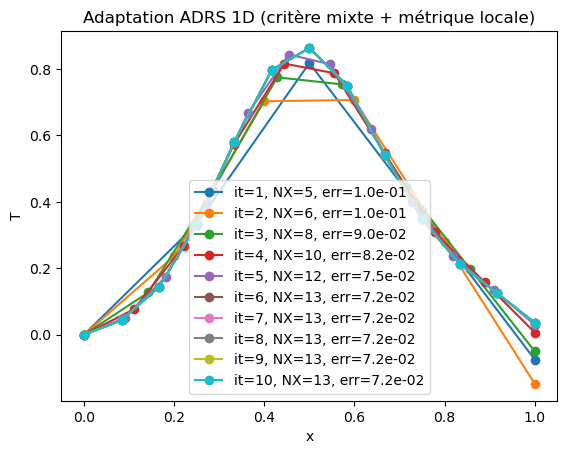

In [38]:
import math
import numpy as np
import matplotlib.pyplot as plt

# --- Paramètres physiques ---
K = 0.01
V = 1.0
lamda = 1.0
freq = 7.0
xmin, xmax = 0.0, 1.0
Time = 2.0

# --- Adaptation ---
niter_refinement = 10
hmin, hmax = 0.01, 0.5
err = 0.01
tol_L2 = 1e-2

# --- Numérique ---
NX = 5
NT = 10000

iter = 0
NX0 = 0
errL2_current = 1e9
hloc = np.ones(NX) * hmax * 0.5

while not (abs(NX - NX0) <= 1 and errL2_current < tol_L2) and iter < niter_refinement:
    iter += 1
    print(f"\n==== ADAPTATION {iter} ====")

    x = np.linspace(xmin, xmax, NX)
    T = np.zeros(NX)
    Tex = np.exp(-20 * (x - 0.5)**2)

    # --- Calcul de F et dt ---
    F = np.zeros(NX)
    dt = 1e30
    for j in range(1, NX-1):
        Tx = (Tex[j+1]-Tex[j-1])/(x[j+1]-x[j-1])
        Txip1 = (Tex[j+1]-Tex[j])/(x[j+1]-x[j])
        Txim1 = (Tex[j]-Tex[j-1])/(x[j]-x[j-1])
        Txx = (Txip1 - Txim1) / (0.5*(x[j+1]+x[j]) - 0.5*(x[j]+x[j-1]))
        F[j] = V*Tx - K*Txx + lamda*Tex[j]
        dt = min(dt, 0.25 * (x[j+1]-x[j-1])**2 / (abs(V)*(x[j+1]-x[j-1]) + 4*K + abs(F[j])*(x[j+1]-x[j-1])**2))
    dt = min(dt, 1e-3)

    print(f"NX={NX}, dt={dt:.2e}")

    # --- Boucle temporelle ---
    metric = np.zeros(NX)
    t = 0
    n = 0
    while t < Time and n < NT:
        n += 1
        dt_eff = min(dt, Time - t)
        t += dt_eff

        RHS = np.zeros(NX)
        for j in range(1, NX-1):
            visnum = 0.25 * (x[j+1]-x[j-1]) * abs(V)
            xnu = K + visnum
            Tx = (T[j+1]-T[j-1])/(x[j+1]-x[j-1])
            Txip1 = (T[j+1]-T[j])/(x[j+1]-x[j])
            Txim1 = (T[j]-T[j-1])/(x[j]-x[j-1])
            Txx = (Txip1 - Txim1) / (0.5*(x[j+1]+x[j]) - 0.5*(x[j]+x[j-1]))
            src = F[j]*np.sin(freq*t) + Tex[j]*np.cos(freq*t)*freq
            RHS[j] = dt_eff * (-V*Tx + xnu*Txx - lamda*T[j] + src)
            metric[j] += min(1/hmin**2, max(1/hmax**2, abs(Txx)/err))

        T[1:-1] += RHS[1:-1]
        T[0] = 0.0
        T[-1] = 2*T[-2] - T[-3]

    # --- Moyenne métrique ---
    metric /= n
    metric = np.clip(metric, 1/hmax**2, 1/hmin**2)
    hloc = np.sqrt(1.0 / metric)

    # --- Calcul erreur L2 ---
    uex = Tex * np.sin(freq * Time)
    errL2_current = np.sqrt(np.trapz((T - uex)**2, x))
    print(f"Erreur L2 = {errL2_current:.3e}")

    # --- Plot ---
    plt.plot(x, T, '-o', label=f'it={iter}, NX={NX}, err={errL2_current:.1e}')

    # --- Adaptation locale du maillage ---
    xnew = [xmin]
    while xnew[-1] < xmax - hmin:
        # interpolation hloc
        i = np.searchsorted(x, xnew[-1]) - 1
        i = max(0, min(i, NX-2))
        hll = (hloc[i]*(x[i+1]-xnew[-1]) + hloc[i+1]*(xnew[-1]-x[i]))/(x[i+1]-x[i])
        hll = min(max(hmin, hll), hmax)
        xnew.append(min(xmax, xnew[-1] + hll))

    NX0 = NX
    NX = len(xnew)
    x = np.array(xnew)

plt.xlabel('x')
plt.ylabel('T')
plt.legend()
plt.title('Adaptation ADRS 1D (critère mixte + métrique locale)')
plt.show()
